In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#make sure that the file spectrum_class.py is in the same folder as this file!
import spectrum_class
import os as os
from astropy.io import fits as fits
from astropy.coordinates import SkyCoord, EarthLocation
import astropy.units as u
import math


In [2]:
gaia_bands = {'R':(6200,9000),
              'B':(4500,6500),
              'G':(4500,8000)}

In [3]:
plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=14

In [4]:
photometrydata = np.genfromtxt('Data/HALO7D_Gaia_possible_targets_photometry.dat',skip_header=1,dtype=['U16','U16','U16','<f8','<f8','<f8'], names=['id','ra','dec','gaiaG','gaiaB','gaiaR'])

In [5]:
idname = photometrydata['id']
ra = photometrydata['ra']
dec = photometrydata['dec']
gaia_g = photometrydata['gaiaG']
gaia_b = photometrydata['gaiaB']
gaia_r = photometrydata['gaiaR']
name = list(idname)

In [6]:
name = list(idname)

In [7]:
fits_data = fits.open('Data/spec1d_science_stars/spec1d.hgc1a.000.G_65084863834752.fits.gz')
start_path = 'Data/spec1d_science_stars'

In [8]:
#Magnitude R vs. median continuum flux level (6200-9000 Angstrom) : hgc1
science_stars_red_hgc1 = []
start_path = 'Data/spec1d_science_stars'

for filename in os.listdir(start_path):
    index = name.index(filename[17:33])
    if filename[7:11] == 'hgc1':
        filepath = 'Data/spec1d_science_stars/' + filename
        with fits.open(filepath) as fits_data:
            blue_data = fits_data[1].data
            red_data = fits_data[2].data
            data_specs = blue_data.field('SPEC').tolist() + red_data.field('SPEC').tolist()
            data_lambdas = blue_data.field('LAMBDA').tolist() + red_data.field('LAMBDA').tolist()
            data_spec = [item for sublist in data_specs for item in sublist]
            data_lambda = [item for sublist in data_lambdas for item in sublist]
            
            median_computation_spec = []
            median_computation_lambda = []
            for i, j in enumerate(data_spec):
                if data_lambda[i] >= 6200 and data_lambda[i] <= 9000:
                    median_computation_spec.append(data_spec[i])
                    median_computation_lambda.append(data_lambda[i])
                else:
                    continue
        median = np.median(median_computation_spec)
        science_stars_red_hgc1.append([index, filename[17:33], -2.5*np.log10(median), gaia_r[index]])


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [9]:
#Magnitude R vs. median continuum flux level (6200-9000 Angstrom)
science_stars_red = []
start_path = 'Data/spec1d_science_stars'
count = 0
for filename in os.listdir(start_path):
    index = name.index(filename[17:33])
    filepath = 'Data/spec1d_science_stars/' + filename
    with fits.open(filepath) as fits_data:
        blue_data = fits_data[1].data
        red_data = fits_data[2].data
        data_specs = blue_data.field('SPEC').tolist() + red_data.field('SPEC').tolist()
        data_lambdas = blue_data.field('LAMBDA').tolist() + red_data.field('LAMBDA').tolist()
        data_spec = [item for sublist in data_specs for item in sublist]
        data_lambda = [item for sublist in data_lambdas for item in sublist]
            
        median_computation_spec = []
        median_computation_lambda = []
        for i, j in enumerate(data_spec):
            if data_lambda[i] >= 6200 and data_lambda[i] <= 9000:
                median_computation_spec.append(data_spec[i])
                median_computation_lambda.append(data_lambda[i])
            else:
                continue
    median = np.median(median_computation_spec)
    science_stars_red.append([index, filename[17:33], -2.5*np.log10(median), gaia_r[index]])
    count +=1
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log10


190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439


In [10]:
print(blue_data.field('SPEC').tolist())

[[0.0, 0.0, 0.0, 0.8881941437721252, 7.053891181945801, 20.792381286621094, -9.406440734863281, 26.10610008239746, 1.7802987098693848, -6.1447319984436035, -30.566272735595703, -7.041803359985352, -20.510629653930664, 50.707481384277344, 2.836452007293701, -17.042341232299805, -5.077080726623535, -24.746061325073242, -54.51403045654297, -12.1239013671875, -65.660888671875, 34.51994323730469, 10.87186336517334, -36.17656707763672, -33.80344772338867, -47.98155975341797, -51.743194580078125, -7.129022598266602, -13.531137466430664, 11.238946914672852, 10.565688133239746, -6.242216110229492, -8.648636817932129, -7.211082935333252, -1.9007856845855713, -35.84769821166992, -49.526084899902344, 7.012465476989746, -7.6235671043396, 2.7609527111053467, 49.54436111450195, -61.14664077758789, 5.274621963500977, -16.288368225097656, -30.363994598388672, -8.311772346496582, -29.440757751464844, -7.1460981369018555, 3.920401096343994, -31.1142520904541, 0.6741297245025635, -6.829890251159668, -11.9

In [11]:
#Magnitude G vs. median continuum flux level (4500-8000 Angstrom)
science_stars_green = []
start_path = 'Data/spec1d_science_stars'
for filename in os.listdir(start_path):
    index = name.index(filename[17:33])
    filepath = 'Data/spec1d_science_stars/' + filename
    with fits.open(filepath) as fits_data:
        blue_data = fits_data[1].data
        red_data = fits_data[2].data
        data_specs = blue_data.field('SPEC').tolist() + red_data.field('SPEC').tolist()
        data_lambdas = blue_data.field('LAMBDA').tolist() + red_data.field('LAMBDA').tolist()
        data_spec = [item for sublist in data_specs for item in sublist]
        data_lambda = [item for sublist in data_lambdas for item in sublist]
            
        median_computation_spec = []
        median_computation_lambda = []
        for i, j in enumerate(data_spec):
            if data_lambda[i] >= 4500 and data_lambda[i] <= 8000:
                median_computation_spec.append(data_spec[i])
                median_computation_lambda.append(data_lambda[i])
            else:
                continue
    median = np.median(median_computation_spec)
    science_stars_green.append([index, filename[17:33], -2.5*np.log10(median), gaia_g[index]])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log10


In [12]:
#Magnitude B vs. median continuum flux level (4500-6500 Angstrom)
science_stars_blue = []
start_path = 'Data/spec1d_science_stars'
for filename in os.listdir(start_path):
    index = name.index(filename[17:33])
    filepath = 'Data/spec1d_science_stars/' + filename
    with fits.open(filepath) as fits_data:
        blue_data = fits_data[1].data
        red_data = fits_data[2].data
        data_specs = blue_data.field('SPEC').tolist() + red_data.field('SPEC').tolist()
        data_lambdas = blue_data.field('LAMBDA').tolist() + red_data.field('LAMBDA').tolist()
        data_spec = [item for sublist in data_specs for item in sublist]
        data_lambda = [item for sublist in data_lambdas for item in sublist]
            
        median_computation_spec = []
        median_computation_lambda = []
        for i, j in enumerate(data_spec):
            if data_lambda[i] >= 4500 and data_lambda[i] <= 6500:
                median_computation_spec.append(data_spec[i])
                median_computation_lambda.append(data_lambda[i])
            else:
                continue
    median = np.median(median_computation_spec)
    science_stars_blue.append([index, filename[17:33], -2.5*np.log10(median), gaia_b[index]])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log10


In [14]:
def InitializePlot():
    plt.clf()
    f= plt.figure(figsize=(8,8))
    plt.xlim()
    plt.ylim()
    plt.xlabel('')
    plt.ylabel('')
    plt.rcParams['font.family']='serif'
    plt.rcParams['font.size']=14

<Figure size 432x288 with 0 Axes>

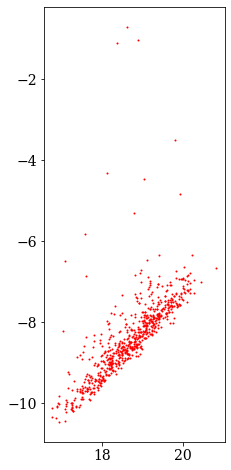

In [15]:
x_red = [item[3] for item in science_stars_red]
y_red = [item[2] for item in science_stars_red]

f = InitializePlot()
plt.scatter(x_red, y_red, c = 'red', s = 1, edgecolors = 'red')
plt.gca().set_aspect('equal')

<Figure size 432x288 with 0 Axes>

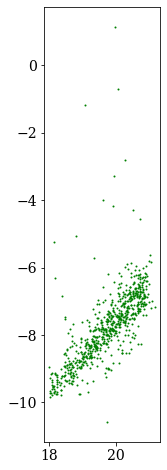

In [16]:
x_green = [item[3] for item in science_stars_green]
y_green = [item[2] for item in science_stars_green]

f = InitializePlot()
plt.scatter(x_green, y_green, c = 'green', s = 1, edgecolors = 'green')
plt.gca().set_aspect('equal')

<Figure size 432x288 with 0 Axes>

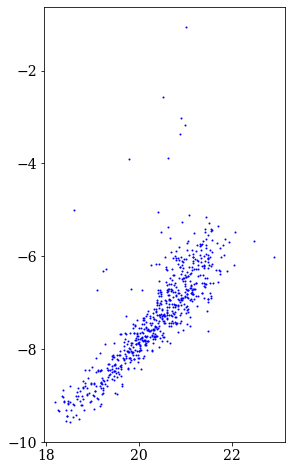

In [17]:
x_blue = [item[3] for item in science_stars_blue]
y_blue = [item[2] for item in science_stars_blue]

f = InitializePlot()
plt.scatter(x_blue, y_blue, c = 'blue', s = 1, edgecolors = 'blue')
plt.gca().set_aspect('equal')

<Figure size 432x288 with 0 Axes>

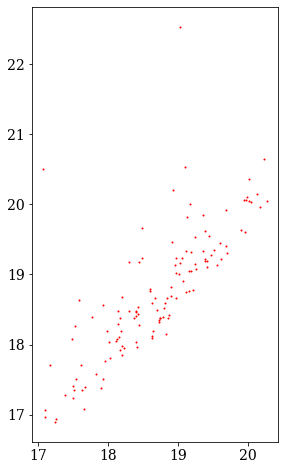

In [17]:
x_red = [item[3] for item in science_stars_red_hgc1]
y_red = [item[2] + 27 for item in science_stars_red_hgc1]

f = InitializePlot()
plt.scatter(x_red, y_red, c = 'red', s = 1, edgecolors = 'red')
plt.gca().set_aspect('equal')